<a href="https://colab.research.google.com/github/Malancha7089/IDEAS_TIHub_Final_Project_Submission/blob/main/Copy_of_07_visualizing_time_series_dataset_global_temp_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

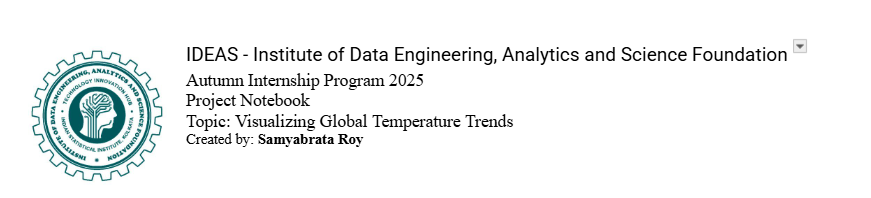

# Notebook: 3

👋 Welcome students!

In this journey, we’re going to take a dataset and slowly uncover the story it tells through visualization. Numbers by themselves can feel cold and endless, but once we turn them into visuals, they begin to speak.


---




---

## 📝 Before We Dive In...

Before we start digging deep into the dataset, let’s pause for a moment and reflect.  
Here are a couple of questions for you to think about (and maybe discuss!):

1. **What do you understand by *Time-Series Data*?**  
   *(Hint: Think about data that is recorded over time — like daily sales data.)*

2. **Do you think choosing Python as our programming language for this analysis is a good decision?**  
   Feel free to share your honest opinion — there’s no right or wrong answer here!  

---

#Introduction



## ⚙️ Setting Things Up

Before we begin our analysis, we need to make sure we have the right tools.  
In the next coding cell, we’ll install and import the required Python packages that will help us explore and visualize the COVID-19 dataset.  


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from datetime import datetime
import requests
from io import StringIO

---

## 📂 Loading Our Dataset

Now that our setup is ready, it’s time to bring in the data we’ll be working with.  
In the next coding cell, we’ll load the COVID-19 dataset directly from **Google Drive** (shared with public view access).  

Once the file is loaded, we’ll **print the first few rows** so that we can get a quick look at what the dataset contains before moving into analysis and visualization.  



In [2]:
# Replace with your Google Drive file ID which has public view access
file_id = "1kRogzVjnT_2qcjLd0x8jHFmWsq1Ek9NB"

# Construct the download URL
url = f"https://drive.google.com/uc?export=download&id={file_id}"

try:
    # Read CSV directly into pandas
    df_temp = pd.read_csv(url)
    print(df_temp.head())
except Exception as e:
    print("Error loading data:", e)


    Source        Date    Mean
0     GCAG  2016-12-06  0.7895
1  GISTEMP  2016-12-06  0.8100
2     GCAG  2016-11-06  0.7504
3  GISTEMP  2016-11-06  0.9300
4     GCAG  2016-10-06  0.7292


* To get more info about metadata of the dataset refer to README file in the root of this notebook directory

##Task:

What if the dataset was not available in any only repo or not hosted anywhere? How can you upload a dataset from your local machine? Code it

In [3]:
from google.colab import files

uploaded = files.upload()

df = pd.read_csv("monthly_csv.csv")
print(df.head())

Saving monthly_csv.csv to monthly_csv.csv
    Source        Date    Mean
0     GCAG  2016-12-06  0.7895
1  GISTEMP  2016-12-06  0.8100
2     GCAG  2016-11-06  0.7504
3  GISTEMP  2016-11-06  0.9300
4     GCAG  2016-10-06  0.7292




---


## EDA including visualization

### Plot 1:

Monthly Revenue Over Time  

Visualizing monthly avg temparature obtaining from 2 different sources, which will help helps us understand trends across the years.  
Are there peaks during certain months (like due to any particular season)? Let’s find out.

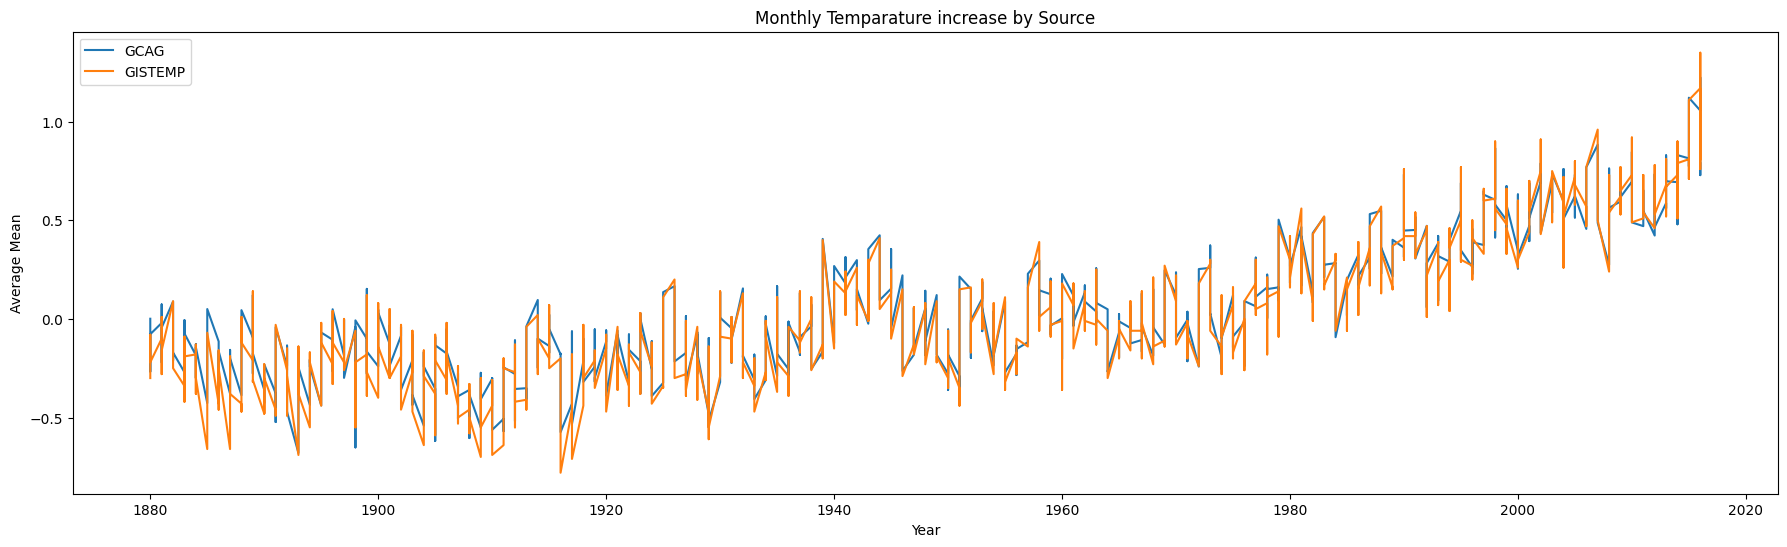

In [6]:
# Convert Date column to datetime
df_temp['Date'] = pd.to_datetime(df_temp['Date'])

# Extract Year from Date column
df_temp['Year'] = df_temp['Date'].dt.year

# Plot line chart
plt.figure(figsize=(22,6))
for source in df_temp['Source'].unique():
    subset = df_temp[df_temp['Source'] == source]
    plt.plot(subset['Year'], subset['Mean'], label=source)

plt.title("Monthly Temparature increase by Source")
plt.xlabel("Year")
plt.ylabel("Average Mean")
plt.legend()
plt.grid(True, linestyle="--", alpha=0)
plt.show()



---



### Plot 2:

12 Months Moving Average

Smoothing out seasonal fluctuations and short-term variations to reveal the underlying long-term temperature trends. The 12-month moving average provides a clearer view of climate patterns by averaging each month with the 11 months surrounding it, making it easier to identify gradual warming or cooling trends over the years.

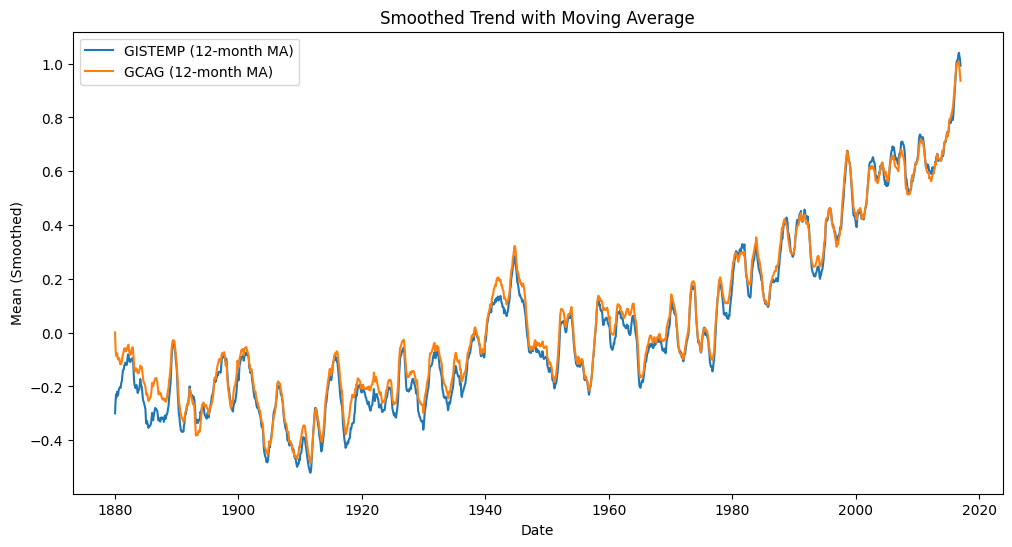

In [7]:
# Sort data by Date
df_temp = df_temp.sort_values(by="Date")

# Calculate moving average (e.g., 12-month window)
df_temp['Moving_Avg'] = df_temp.groupby('Source')['Mean'].transform(lambda x: x.rolling(window=12, min_periods=1).mean())

# Plot moving average
plt.figure(figsize=(12,6))
for source in df_temp['Source'].unique():
    subset = df_temp[df_temp['Source'] == source]
    plt.plot(subset['Date'], subset['Moving_Avg'], label=f"{source} (12-month MA)")

plt.title("Smoothed Trend with Moving Average")
plt.xlabel("Date")
plt.ylabel("Mean (Smoothed)")
plt.legend()
plt.show()


Q. How would you interpet this?

Construct another line plot by taking any one of the souces in count and try to smooth-out the variation more and try to come up with a trend

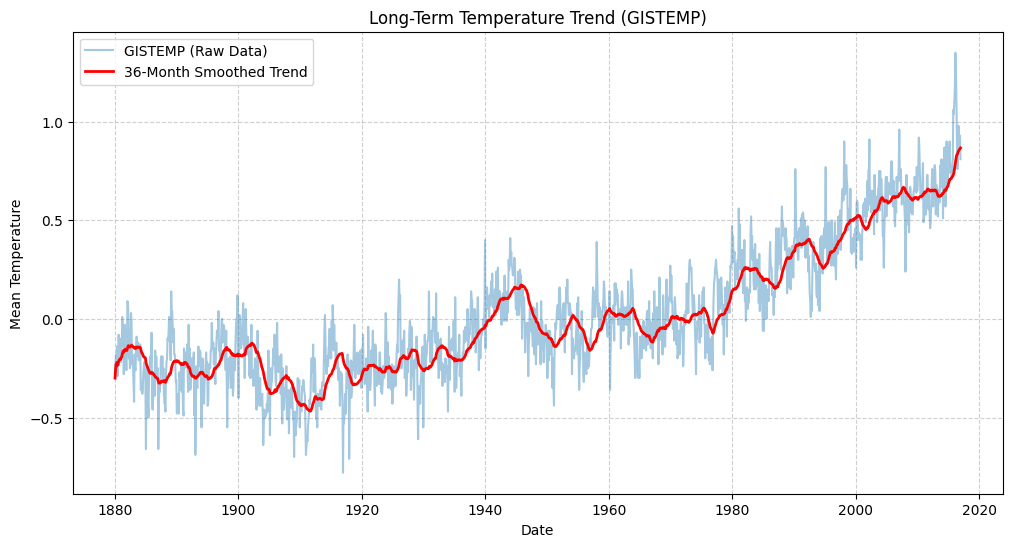

In [8]:
# Pick one source (e.g., first unique source)
one_source = df_temp['Source'].unique()[0]
df_one = df_temp[df_temp['Source'] == one_source].copy()

# Apply a stronger smoothing (36-month rolling mean)
df_one['Trend_36M'] = df_one['Mean'].rolling(window=36, min_periods=1).mean()

# Plot
plt.figure(figsize=(12,6))
plt.plot(df_one['Date'], df_one['Mean'], alpha=0.4, label=f"{one_source} (Raw Data)")
plt.plot(df_one['Date'], df_one['Trend_36M'], color="red", linewidth=2, label="36-Month Smoothed Trend")

plt.title(f"Long-Term Temperature Trend ({one_source})")
plt.xlabel("Date")
plt.ylabel("Mean Temperature")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()




---


### Plot 3

Seasonal Temperature Heatmap (Last 50 Years)

A comprehensive heatmap displaying temperature variations across months and years over the past five decades. This visualization reveals seasonal patterns, climate shifts, and anomalies by showing how temperatures have changed month-by-month across different years. Warmer periods appear as lighter/warmer colors while cooler periods show as darker/cooler colors, making it easy to spot seasonal consistency, unusual weather events, and long-term climate trends.

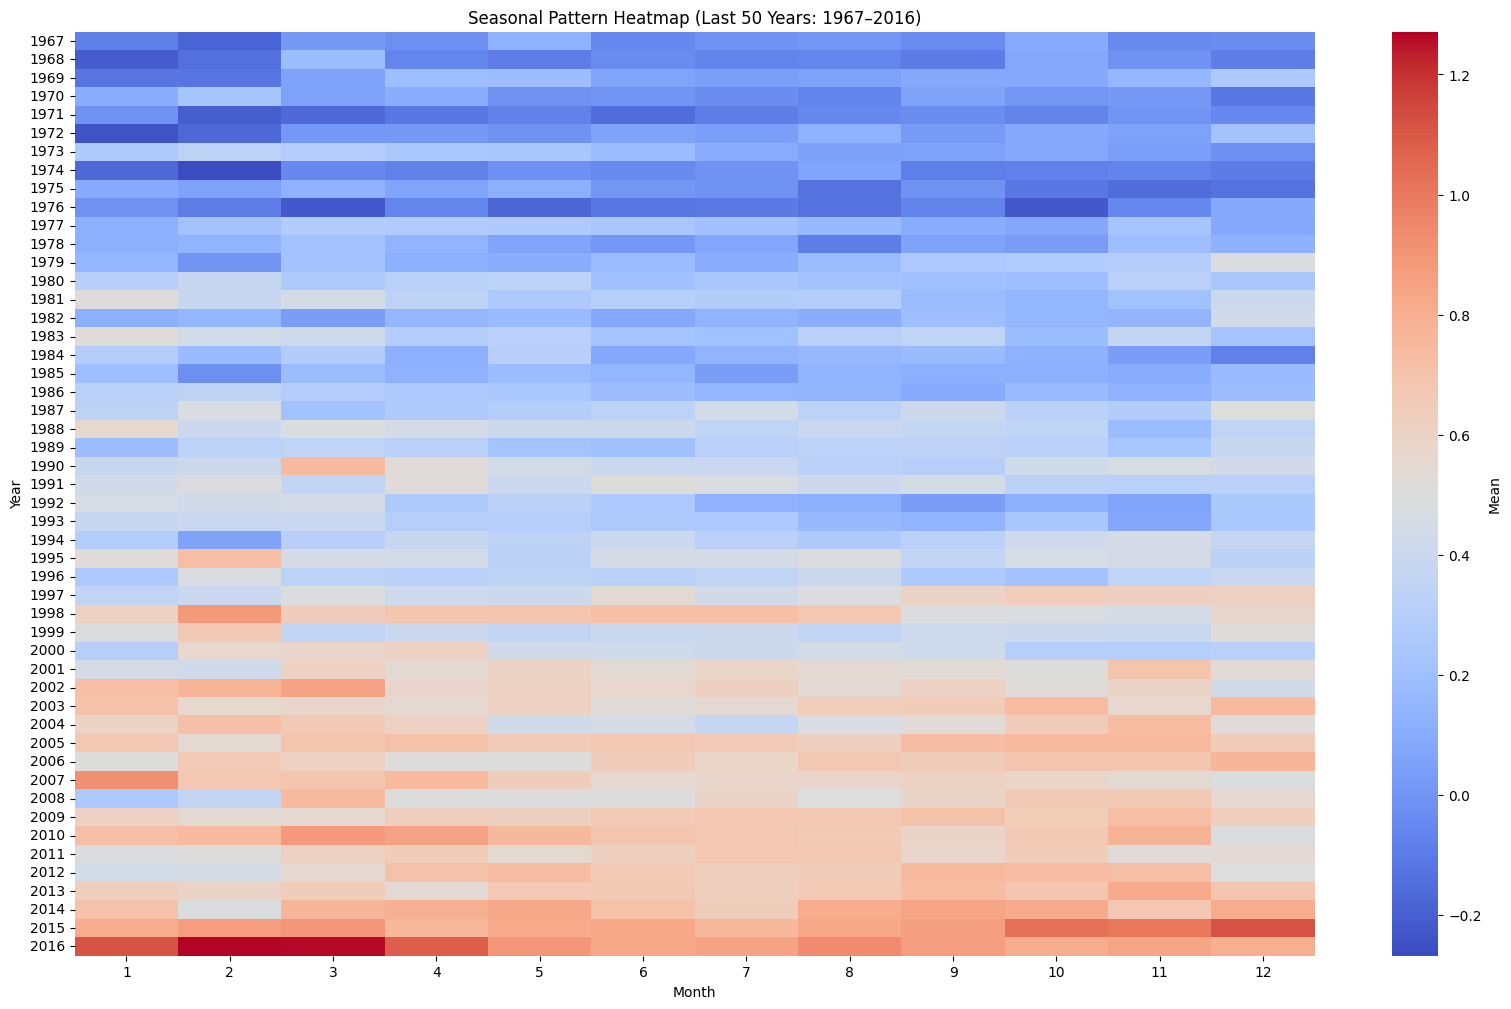

In [9]:
# Extract Year and Month
df_temp['Year'] = df_temp['Date'].dt.year
df_temp['Month'] = df_temp['Date'].dt.month

# Filter last 50 years
latest_year = df_temp['Year'].max()
df_last50 = df_temp[df_temp['Year'] >= latest_year - 49]

# Group by Year and Month (average across sources if needed)
seasonal_data = df_last50.groupby(['Year','Month'])['Mean'].mean().reset_index()

# Pivot for heatmap
heatmap_data = seasonal_data.pivot(index='Year', columns='Month', values='Mean')

# Plot heatmap
plt.figure(figsize=(20,12))
sns.heatmap(heatmap_data, cmap="coolwarm", annot=False, cbar_kws={'label': 'Mean'})
plt.title(f"Seasonal Pattern Heatmap (Last 50 Years: {latest_year-49}–{latest_year})")
plt.xlabel("Month")
plt.ylabel("Year")
plt.show()


Q. How about we try to visualize last 20 years rather? Construct the plot



---

Task:

What type of charts could have served the same purpose done in plot 3? Plot any one of them (apart from heatmap) and visualize seasonal variation

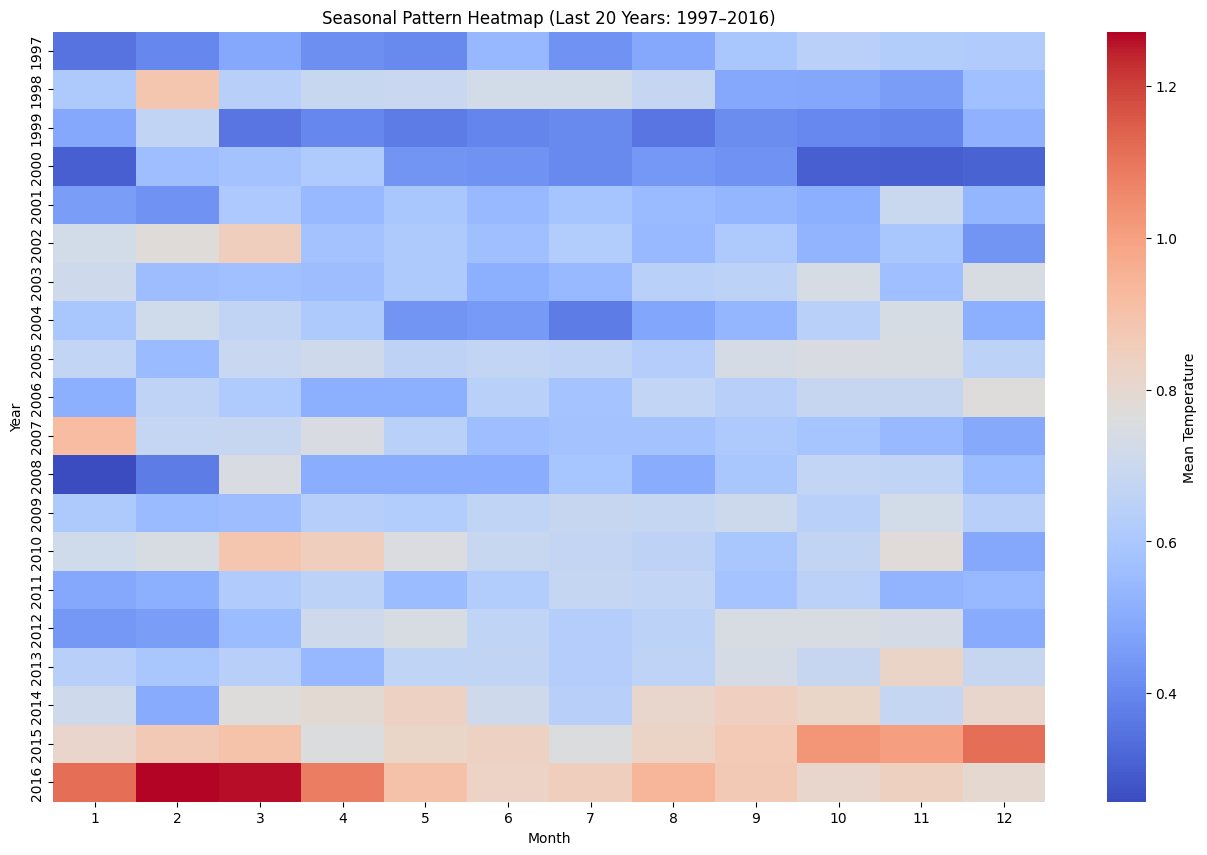

In [10]:
# Extract Year and Month already done earlier
df_temp['Year'] = df_temp['Date'].dt.year
df_temp['Month'] = df_temp['Date'].dt.month

# Filter last 20 years
latest_year = df_temp['Year'].max()
df_last20 = df_temp[df_temp['Year'] >= latest_year - 19]

# Group by Year and Month (average across sources if needed)
seasonal_data20 = df_last20.groupby(['Year','Month'])['Mean'].mean().reset_index()

# Pivot for heatmap
heatmap_data20 = seasonal_data20.pivot(index='Year', columns='Month', values='Mean')

# Plot heatmap
plt.figure(figsize=(16,10))
sns.heatmap(heatmap_data20, cmap="coolwarm", annot=False, cbar_kws={'label': 'Mean Temperature'})
plt.title(f"Seasonal Pattern Heatmap (Last 20 Years: {latest_year-19}–{latest_year})")
plt.xlabel("Month")
plt.ylabel("Year")
plt.show()



---



### Assignment:

Find a similar dataset from any public repository or constrt a synthetic data from `www.syngendata.ai` and perform similart analysis to draw inference

00: % This file contains a detailed summary of the changes in Earth's global average
01: % surface temperature estimated by combining the Berkeley Earth land-surface
02: % temperature field with a reinterpolated version of the HadSST ocean temperature 
03: % field.  
04: % The current citation for this dataset is: 
05: % 
06: %    Rohde, R. A. and Hausfather, Z.: The Berkeley Earth Land/Ocean Temperature
07: %    Record, Earth Syst. Sci. Data, 12, 3469ï¿½3479, 
08: %    https://doi.org/10.5194/essd-12-3469-2020, 2020.
09: % 
10: % The dataset differs slightly from the dataset as described in the citation as 
11: % HadSST3 has been replaced with the newer HadSST4, and associated interpolation 
12: % parameters have been refit accordingly.  No other changes in methods were needed 
13: % when moving to the new version of HadSST. 
14: % 
15: % Two versions of this average are reported.  These differ in how they treat 
16: % locations with sea ice.  In the first version, temperature anomali

/tmp/ipython-input-2675115256.py:26: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df_all = pd.read_csv(StringIO(text),


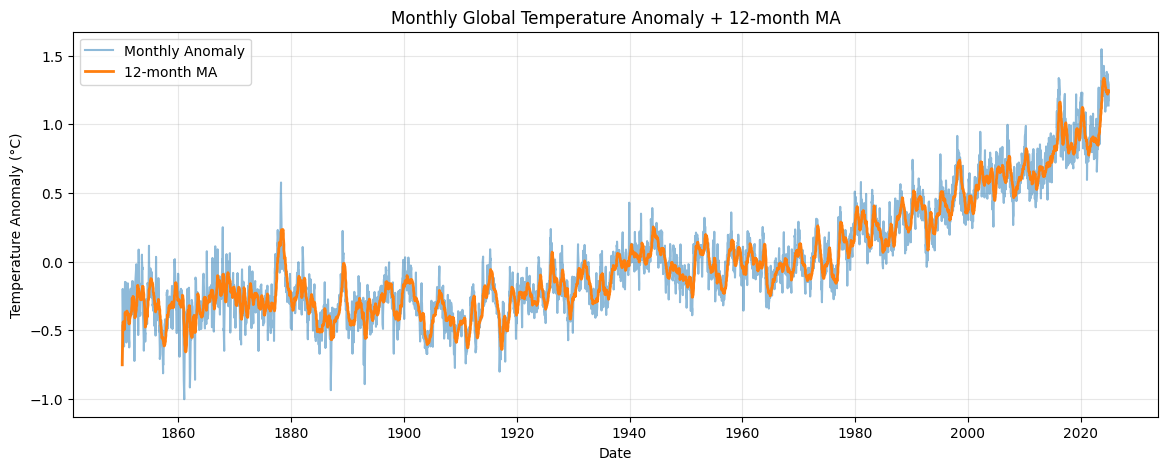

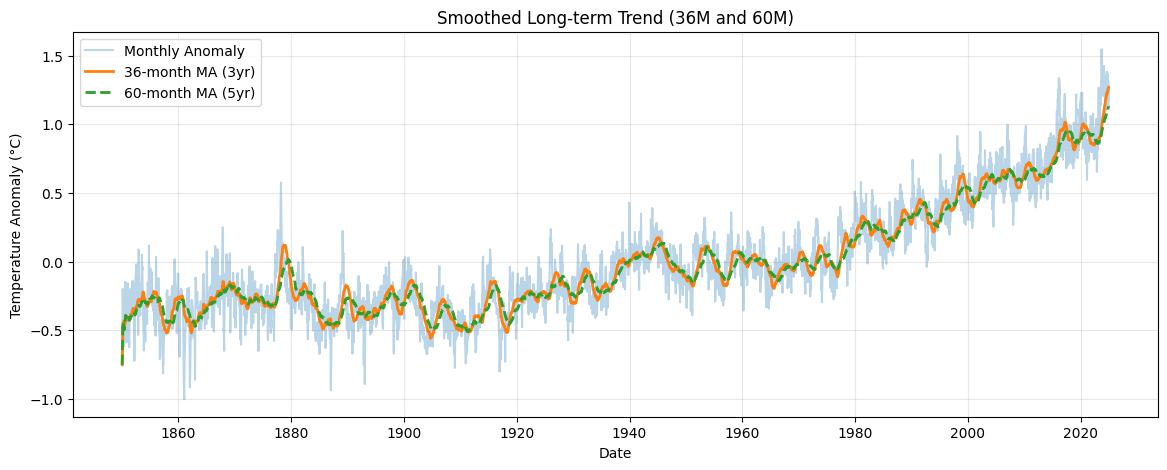

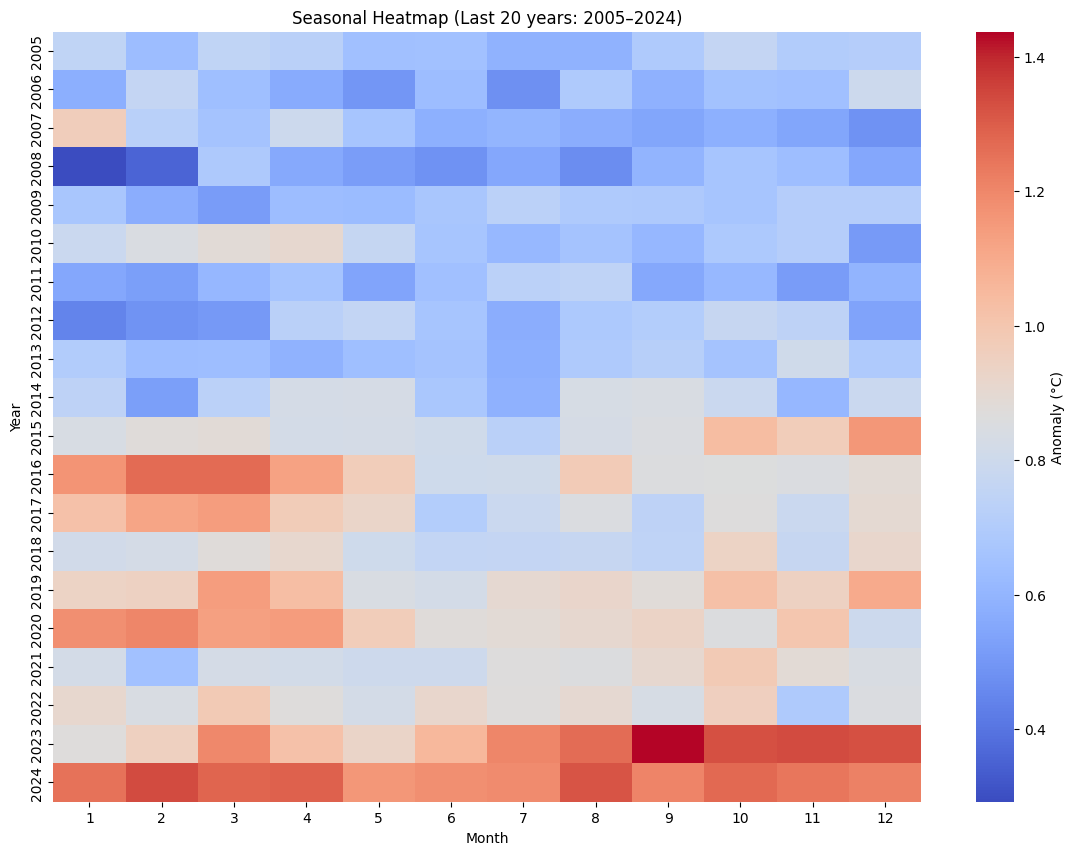

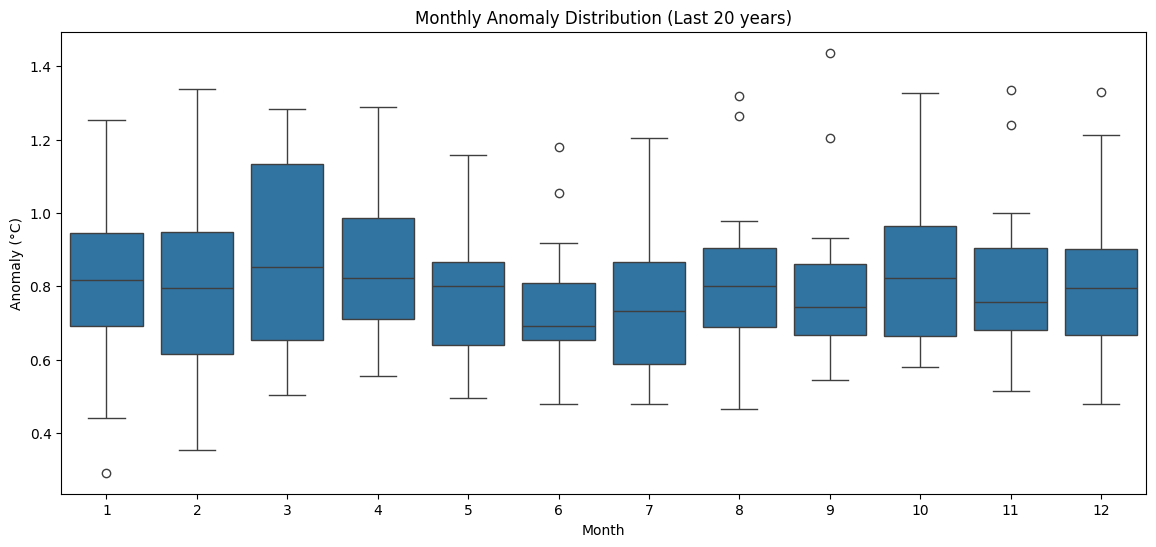

Saved parsed data to Berkeley_Land_Ocean_parsed.csv


In [11]:
# URL you gave
url = "https://berkeley-earth-temperature.s3.us-west-1.amazonaws.com/Global/Land_and_Ocean_complete.txt"

# 1) Download the text file (works in normal Python/Colab)
resp = requests.get(url)
resp.raise_for_status()
text = resp.text

# 2) Inspect first lines (optional)
for i, line in enumerate(text.splitlines()[:40]):
    print(f"{i:02d}: {line}")
# (You'll see header comments beginning with '%' and then a whitespace-delimited table)

# 3) Read into pandas, skipping comment lines starting with '%'
# The data columns are whitespace-separated. We provide expected column names:
col_names = [
    "Year", "Month",
    "Anomaly", "Unc_Month",            # monthly anomaly and uncertainty
    "Anomaly_Annual", "Unc_Annual",    # centered annual anomaly (reported at mid year) and its uncertainty
    "Anomaly_5yr", "Unc_5yr",
    "Anomaly_10yr", "Unc_10yr",
    "Anomaly_20yr", "Unc_20yr"
]

# Use StringIO to let pandas read the downloaded text
df_all = pd.read_csv(StringIO(text),
                     delim_whitespace=True,
                     comment='%',
                     header=None,
                     names=col_names,
                     engine='python',
                     na_values=["---", "NaN"])
# Sometimes there can be extra trailing spaces producing fewer/more columns;
# if parsing fails, read with 'sep=r"\s+"' instead.

# Quick sanity check
print("Shape:", df_all.shape)
print(df_all.head(6))

# 4) Make a Date column (choose day=15 to represent mid-month)
df_all['Date'] = pd.to_datetime(df_all[['Year','Month']].assign(DAY=15))
df_all = df_all.sort_values('Date').reset_index(drop=True)

# 5) Basic EDA printouts
print("\nTime range:", df_all['Date'].min(), "to", df_all['Date'].max())
print(df_all.describe())

# ---------------------
# Plot A: Monthly Anomaly over Time + 12M moving average
# ---------------------
plt.figure(figsize=(14,5))
plt.plot(df_all['Date'], df_all['Anomaly'], alpha=0.5, label='Monthly Anomaly')
df_all['MA_12'] = df_all['Anomaly'].rolling(window=12, min_periods=1, center=False).mean()
plt.plot(df_all['Date'], df_all['MA_12'], linewidth=2, label='12-month MA')
plt.title("Monthly Global Temperature Anomaly + 12-month MA")
plt.xlabel("Date")
plt.ylabel("Temperature Anomaly (°C)")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# ---------------------
# Plot B: Heavier smoothing for trend (36-month / 60-month)
# ---------------------
plt.figure(figsize=(14,5))
plt.plot(df_all['Date'], df_all['Anomaly'], alpha=0.3, label='Monthly Anomaly')
df_all['MA_36'] = df_all['Anomaly'].rolling(window=36, min_periods=1).mean()
df_all['MA_60'] = df_all['Anomaly'].rolling(window=60, min_periods=1).mean()
plt.plot(df_all['Date'], df_all['MA_36'], linewidth=2, label='36-month MA (3yr)')
plt.plot(df_all['Date'], df_all['MA_60'], linewidth=2, linestyle='--', label='60-month MA (5yr)')
plt.title("Smoothed Long-term Trend (36M and 60M)")
plt.xlabel("Date")
plt.ylabel("Temperature Anomaly (°C)")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# ---------------------
# Plot C: Seasonal Heatmap for last 20 years + alternative Boxplot
# ---------------------
# Extract Year and Month (already present)
latest_year = int(df_all['Year'].max())
df_last20 = df_all[df_all['Year'] >= latest_year - 19].copy()

# Group by Year-Month and pivot into matrix Year x Month
seasonal_data20 = df_last20.groupby(['Year','Month'])['Anomaly'].mean().reset_index()
heatmap_data20 = seasonal_data20.pivot(index='Year', columns='Month', values='Anomaly')

plt.figure(figsize=(14,10))
sns.heatmap(heatmap_data20, cmap="coolwarm", annot=False, cbar_kws={'label': 'Anomaly (°C)'})
plt.title(f"Seasonal Heatmap (Last 20 years: {latest_year-19}–{latest_year})")
plt.xlabel("Month")
plt.ylabel("Year")
plt.show()

# Alternative: monthly boxplots over last 20 years to show distribution & seasonality
plt.figure(figsize=(14,6))
sns.boxplot(x='Month', y='Anomaly', data=seasonal_data20, whis=1.5)
plt.title("Monthly Anomaly Distribution (Last 20 years)")
plt.xlabel("Month")
plt.ylabel("Anomaly (°C)")
plt.show()

# ---------------------
# Optional: Save a CSV of parsed, cleaned data
# ---------------------
df_all.to_csv("Berkeley_Land_Ocean_parsed.csv", index=False)
print("Saved parsed data to Berkeley_Land_Ocean_parsed.csv")